In [1]:
import pandas as pd
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as sfa
from statsmodels.formula.api import ols
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import scipy.stats as stats
import os

In [11]:
df = pd.read_csv('Fig2B.csv', sep = "\t")
df.head()

,Individual,Red,Green,IRT1,NRAMP1,Genotype,Greenness
0,2,108.094,165.605,1,1,HH,1.532046
1,3,109.157,169.087,1,1,HH,1.549026
2,4,118.082,174.788,1,1,HH,1.480226
3,5,119.839,175.189,2,2,FF,1.461870
4,6,111.939,174.156,1,1,HH,1.555812


In [12]:
df_filtered=df.loc[(df['Genotype'] != 'Col-0') & (df['Genotype'] != 'F13-8')]

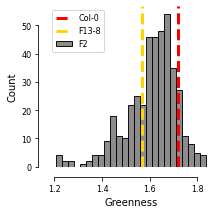

In [13]:
cm = 1/2.54
f, ax = plt.subplots(1,figsize=(7.5*cm, 7.5*cm))                               
plt.hist(df_filtered['Greenness'],
               stacked=True,
                bins=25,
                alpha=0.9,
                color=['gray'],
                histtype='bar', 
                ec='black')
plt.axvline(df.groupby('Genotype').get_group('Col-0').Greenness.mean(), 
            linestyle='dashed', 
            color = 'red',
            label = 'Col-0',
            linewidth=3)
plt.axvline(df.groupby('Genotype').get_group('F13-8').Greenness.mean(), 
            linestyle='dashed', 
            color = 'gold',
            label = 'F13-8',
            linewidth=3)
plt.legend(['Col-0','F13-8','F2'],fontsize=8,loc='upper left')
plt.tick_params(labelsize=8)
plt.xlabel('Greenness',fontsize=10)
plt.ylabel('Count',fontsize=10)
sns.despine(offset=10, trim=True)
plt.savefig("Fig2B.png", format="png",bbox_inches="tight",facecolor='w',dpi=800)